In [36]:
import modin.pandas as pd
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [24]:
#function to encode the categorical variables with an option for specifc columns
def encode_categorical(df, columns=None):
    le = LabelEncoder()
    encoded_columns = []
    for column in columns:
        df[column] = le.fit_transform(df[column])
        encoded_columns.append(column)
    return df, encoded_columns

#function to scale the numerical variables with an option for specific columns
def scale_numerical(df, columns=None):
    scaler = StandardScaler()
    scaled_columns = []
    for column in columns:
        df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))
        scaled_columns.append(column)
    return df, scaled_columns



In [16]:
titanic = pd.read_csv('/home/alex/Projects/DataSci/SampleData/Titanic/train.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
categorical = ['Sex', 'Embarked', 'Pclass']


In [21]:
df_ml = titanic.drop(['Name', 'PassengerId','Ticket', 'Cabin'], axis=1)
df_ml_en, encoded_cols = encode_categorical(df_ml, categorical)


In [22]:
df_ml_en.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,22.0,1,0,7.2500,2
1,1,0,0,38.0,1,0,71.2833,0
2,1,2,0,26.0,0,0,7.9250,2
3,1,0,0,35.0,1,0,53.1000,2
4,0,2,1,35.0,0,0,8.0500,2


In [25]:
df_ml_sen , scaled_cols = scale_numerical(df_ml_en, ['Age', 'Fare',  'Parch'])

In [26]:
df_ml_sen.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,-0.530377,1,-0.473674,-0.502445,2
1,1,0,0,0.571831,1,-0.473674,0.786845,0
2,1,2,0,-0.254825,0,-0.473674,-0.488854,2
3,1,0,0,0.365167,1,-0.473674,0.420730,2
4,0,2,1,0.365167,0,-0.473674,-0.486337,2


In [28]:
#order by all columns
df_ml_sen = df_ml_sen.reindex(sorted(df_ml_sen.columns), axis=1)

In [29]:
x = df_ml_sen.drop('Survived', axis=1)
y = df_ml_sen['Survived']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.5,
    colsample_bytree=0.5,
    gamma=1,
    random_state=42
)

model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [32]:
y_pred = model.predict(x_test)
pred_proba = model.predict_proba(x_test)

In [38]:
accuracy_score = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

In [34]:
print(f'Accuracy: {accuracy_score}')

Accuracy: 0.8100558659217877


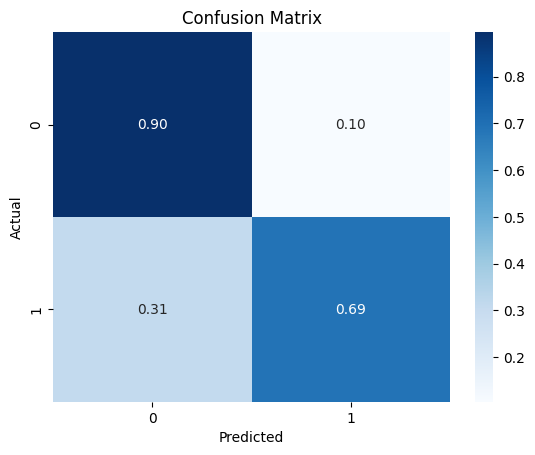

In [39]:
confusion_matrix_per = confusion_matrix / confusion_matrix.sum(axis=1)[:, None]
plt.figure
sns.heatmap(confusion_matrix_per, annot=True, fmt=".2f", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()